In [1]:
%load_ext autoreload
%autoreload 2

import simple_sim.simulation_server as World
import simple_sim.simulation_objects as Objects
import pybullet_data as pbd
import os

In [2]:
# Make a new gui server
server = World.simulationServer()

In [3]:
# Add a simple plane
objectFile = os.path.join(pbd.getDataPath(), 'plane.urdf')
Test = Objects.SimulationObject(server, objectFile)

In [4]:
objectFile = os.path.join(pbd.getDataPath(), 'r2d2.urdf')
Robot = Objects.SimulationObject(server, objectFile, robot = True, basePosition = (2, 0, 1))

In [5]:
Robot.addJointMeasurement('base_to_right_leg', variables = ['position', 'velocity', 'force', 'motor_torque'])
Robot.addLinkMeasurement('head', variables= ['position', 'angular_velocity', 'orientation'])

In [6]:
server.setGravity([0, 0, 10])
server.startSimulation(5.)
while(server.simulation_running):
    World.sleep(1e-4)

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


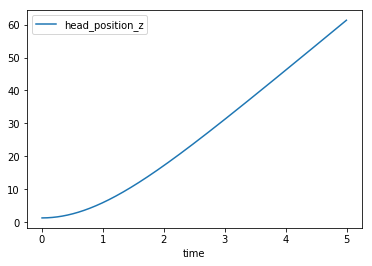

In [8]:
server.measurements.plot("time", ["head_position_z"])

In [9]:
server.setGravity([0, 0, -20])
server.startSimulation(10.)

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


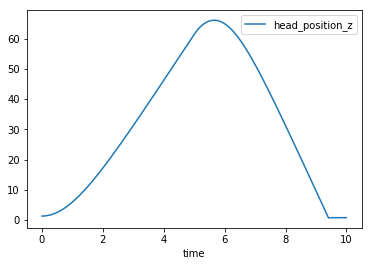

In [10]:
server.measurements.plot("time", "head_position_z")

In [11]:
server.saveStatus?

Signature: server.saveStatus(save_state=False, on_disk=False, filename=None)
Docstring:
Save the current status of the simulation. 

Either stores 
- an initial configuration (save_state = False ,on_disk = False) with a sufficient filename
- current state in memory (save_state = True, on_disk = False)
- current state on disk (save_state = True, on_disk = True) with a sufficient filename

Is a wrapper for pybullet.saveWorld, saveState, saveBullet

Returns:
    state_id, filename
File:      /media/jmartensen/Data/general/teaching/2018_CRRN/code/simple_sim/src/simple_sim/simulation_server.py
Type:      method
